In [8]:
import HelperReviewAnalysis as helper
import ReadData as rd
import pandas as pd
from pandas.io.json import json_normalize
from matplotlib import pyplot as plt

reviewFile="dataset/reviewShuffled.json"
businessFile="dataset/business.json"
userFile="dataset/user.json"

In [2]:
reviewdata=rd.readData(fileName=reviewFile,breakCondition=5000000)

Data Loaded
Total Data:  4736897


In [19]:
len(reviewdata)

4736897

In [17]:
userdata=rd.readData(fileName=userFile,breakCondition=5000000)

Data Loaded
Total Data:  1183362


In [127]:
def getRestaurantBusinesses():
    bdata=rd.readData(fileName=businessFile,breakCondition=10000000)
    businessSet=[]
    bData=[]
    for b in bdata:
        bid,categoryList=b['business_id'],b['categories']
        if 'Restaurants' in categoryList:
            bData.append(b)
            businessSet.append(bid)
#     bdata=pd.DataFrame(bData,index=businessSet)
    return bData,businessSet

def getGeographicalRestaurants(bdata,businessSet,state="AZ"):
    bData=pd.DataFrame(bdata,index=businessSet)
    stateBusinesses=bData[bData.state==state]
    return stateBusinesses

def getRestaurantReviews(reviewdata,businessSet):
    businessSet=set(businessSet.business_id)    
    print("Data Loaded")
    data=[]
    for d in reviewdata:
        bid=d['business_id']
        if bid in businessSet:
            data.append(d)
    print(len(data))
    return data


In [128]:
bdata,businessSet=getRestaurantBusinesses()
len(bdata),len(businessSet)



Data Loaded
Total Data:  156639


(51613, 51613)

In [132]:
totRestauarantsData=pd.DataFrame(bdata,index=businessSet)
totdata=getRestaurantReviews(reviewdata,totRestauarantsData)
totRestauarantsData=[]
totdataDF=pd.DataFrame(totdata)
totalRestaurantsRatings = pd.crosstab(index=totdataDF["stars"],columns="Count")
totalRestaurantsRatings

Data Loaded
2927731


col_0,Count
stars,
1,322261
2,285644
3,417488
4,818771
5,1083567


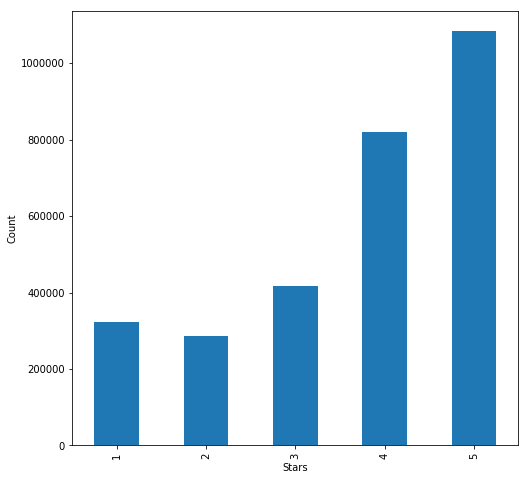

In [147]:
totalRestaurantsRatings.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True,legend=None)
plt.xlabel('Stars')
plt.ylabel('Count')
plt.savefig("Plots/ratingOverallDistribution.pdf",format="pdf")
plt.show()

In [5]:
azData=getGeographicalRestaurants(bdata,businessSet,state="AZ")
# print(bdata[:1])
print(len(bdata),len(azData))

51613 10219


In [6]:
azData[:1]

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
duHFBe87uNSXImQmvBh87Q,4719 N 20Th St,"{'RestaurantsTableService': False, 'GoodForMea...",duHFBe87uNSXImQmvBh87Q,"[Sandwiches, Restaurants]",Phoenix,{},0,33.505928,-112.038847,Blimpie,,85016,10,4.5,AZ


In [15]:
azData['stars'].value_counts()

4.0    2574
3.5    2440
3.0    1827
2.5    1139
4.5    1093
2.0     618
1.5     234
5.0     222
1.0      72
Name: stars, dtype: int64

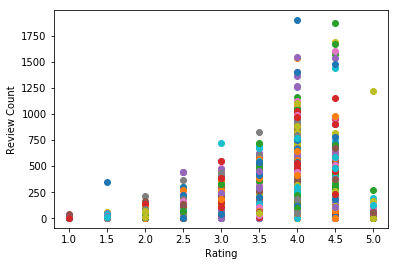

In [18]:
x,y = [],[]
y.append (azData.stars)
x.append (azData.review_count)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(y,x,'o-')
ax.set_ylabel("Review Count")
ax.set_xlabel("Rating")
plt.savefig("Plots/RatingReviewCountPlot.pdf",format="pdf")
plt.show()


In [20]:
data=getRestaurantReviews(reviewdata,azData)


Data Loaded
837240


In [21]:
data[:1]

[{'business_id': 'dQZOCI_IIxrUKPnRa56yog',
  'cool': 0,
  'date': '2017-01-13',
  'funny': 0,
  'review_id': 'tSgCahyLXjHjMWQyCHrQ8g',
  'stars': 2,
  'text': 'Hit and miss with food quality - maybe it depends on who is cooking that day.  We were there in Dec 2016 and ordered the Walleye dinner and Gyros plate.  LOVED both - perfectly cooked and delicious.  If I had written this review then, it would be 5 stars.  However we went again last week (Jan 2017), ordered the same identical plates and were totally disappointed.  Everything was underdone.  The walleye, fries, gyro meat, pita = all undercooked and not hot. We probably should have returned it all.  Doubt if we will take a chance again.',
  'useful': 0,
  'user_id': 'rOKLo5-U4HTg_q3tV1nbbg'}]

In [51]:
reviewDF=pd.DataFrame(data)

In [124]:
len(reviewDF)

837240

In [126]:
reviewDF["stars"].value_counts()

5    340433
4    216306
3    101890
1     99174
2     79437
Name: stars, dtype: int64

In [52]:
reviewDF.set_index(reviewDF.date)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
date,,,,,,,,,
2017-01-13,dQZOCI_IIxrUKPnRa56yog,0,2017-01-13,0,tSgCahyLXjHjMWQyCHrQ8g,2,Hit and miss with food quality - maybe it depe...,0,rOKLo5-U4HTg_q3tV1nbbg
2014-07-21,UlGwSAqsPzi-al84UNONdA,1,2014-07-21,1,T3LAD2ILJf5cqYQyLgBlUw,5,On my way home from work and I pass this place...,3,HYG0ar5bCJOdkznV7MaI4Q
2016-04-19,ddLH_-W5Gr9Az4M5Xo981w,0,2016-04-19,0,yrk1c-QdkYRvxa_w-JPpeg,1,Food is very good but service is very bad. We ...,0,HVviyZdEqJnjQhdkZ0YYEQ
2010-03-23,bD9W3huq5TDbAxm98JDKVA,0,2010-03-23,0,Q5_1QZKc0y86dWahZXZ0bg,3,"First time burger and fries mix, the sweet pot...",1,Mz3ZAFChRgBMgaaB5sJU_Q
2010-07-02,0DCRyiF8BoyXZOoStIdtAw,0,2010-07-02,0,NNVf4JLRa1A6pQELp0pkzg,5,sad that this place closed last yr we would go...,1,SRbK_qIGuWNDLDZYrlEVEQ
2017-05-14,eswEA8M7pyx9D_6RI-iZLw,0,2017-05-14,0,P-5uKt7tmYm-qwQF3350ig,5,Wow! Fanstastic street tacos! Will definitely ...,0,KyILb097yD3kS1RHnNPNnw
2017-06-16,OwYpVa-JnVjfEz4iVZk3ZQ,0,2017-06-16,0,rCedtoYZV8gY4TO8diHQTg,5,Our server Arielle was awesome trying to deal ...,0,_WcWXybHLhTfZwWJKwbWNg
2008-03-26,vz8HFGsITt6aj-nyXkAEFg,2,2008-03-26,2,DZt8jg991fhlVW35WGSYcQ,5,I've been going here for years and I just love...,3,T8LqkYbwMPZmvXSsUfN8sQ
2013-12-28,khxjYMwb_V8UovvwPVhysw,0,2013-12-28,0,icREZ9Ul2VFZIpXqMTkZFw,2,Went for take out and was very disappointed. ...,0,LKd2xSqWs13tvkcxy1_9Gg


In [53]:
reviewDF.date.min(),reviewDF.date.max()

('2005-02-02', '2017-07-26')

In [56]:
from datetime import datetime
reviewDF['date'] = pd.to_datetime(reviewDF['date'])
reviewDF.index = reviewDF['date']
del reviewDF['date']
reviewDF

,business_id,cool,funny,review_id,stars,text,useful,user_id
date,,,,,,,,
2017-01-13,dQZOCI_IIxrUKPnRa56yog,0,0,tSgCahyLXjHjMWQyCHrQ8g,2,Hit and miss with food quality - maybe it depe...,0,rOKLo5-U4HTg_q3tV1nbbg
2014-07-21,UlGwSAqsPzi-al84UNONdA,1,1,T3LAD2ILJf5cqYQyLgBlUw,5,On my way home from work and I pass this place...,3,HYG0ar5bCJOdkznV7MaI4Q
2016-04-19,ddLH_-W5Gr9Az4M5Xo981w,0,0,yrk1c-QdkYRvxa_w-JPpeg,1,Food is very good but service is very bad. We ...,0,HVviyZdEqJnjQhdkZ0YYEQ
2010-03-23,bD9W3huq5TDbAxm98JDKVA,0,0,Q5_1QZKc0y86dWahZXZ0bg,3,"First time burger and fries mix, the sweet pot...",1,Mz3ZAFChRgBMgaaB5sJU_Q
2010-07-02,0DCRyiF8BoyXZOoStIdtAw,0,0,NNVf4JLRa1A6pQELp0pkzg,5,sad that this place closed last yr we would go...,1,SRbK_qIGuWNDLDZYrlEVEQ
2017-05-14,eswEA8M7pyx9D_6RI-iZLw,0,0,P-5uKt7tmYm-qwQF3350ig,5,Wow! Fanstastic street tacos! Will definitely ...,0,KyILb097yD3kS1RHnNPNnw
2017-06-16,OwYpVa-JnVjfEz4iVZk3ZQ,0,0,rCedtoYZV8gY4TO8diHQTg,5,Our server Arielle was awesome trying to deal ...,0,_WcWXybHLhTfZwWJKwbWNg
2008-03-26,vz8HFGsITt6aj-nyXkAEFg,2,2,DZt8jg991fhlVW35WGSYcQ,5,I've been going here for years and I just love...,3,T8LqkYbwMPZmvXSsUfN8sQ
2013-12-28,khxjYMwb_V8UovvwPVhysw,0,0,icREZ9Ul2VFZIpXqMTkZFw,2,Went for take out and was very disappointed. ...,0,LKd2xSqWs13tvkcxy1_9Gg


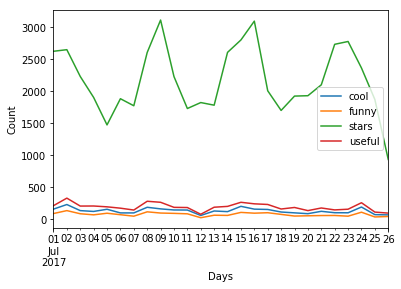

In [144]:
test=reviewDF['7/1/2017':'7/28/2017']
test.resample('D').sum().plot()
plt.xlabel('Days')
plt.ylabel('Count')
plt.savefig("Plots/DailyTimeSeriesAnalysis.pdf",format="pdf")
plt.show()

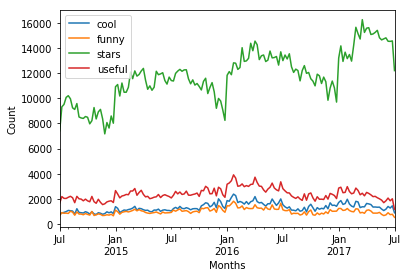

In [142]:
test=reviewDF['7/1/2014':'7/1/2017']
test.resample('W').sum().plot()
plt.xlabel('Months')
plt.ylabel('Count')
plt.savefig("Plots/MonthlyTimeSeriesAnalysis.pdf",format="pdf")
plt.show()

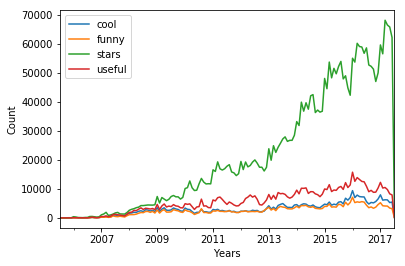

In [143]:
test=reviewDF['7/1/2005':'7/1/2017']
test.resample('M').sum().plot()
plt.xlabel('Years')
plt.ylabel('Count')
plt.savefig("Plots/YearlyTimeSeriesAnalysis.pdf",format="pdf")
plt.show()

In [ ]:
featDF=json_normalize(bdata)

In [ ]:
bIdMap=dict(zip(range(len(featDF)), businessSet))

In [ ]:
featDF=featDF.rename(bIdMap)
featDF=featDF[featDF.state=="AZ"]

In [ ]:
featDF[:100]

In [ ]:
def cleanFeatureMatrix(df):
    for d in df.columns:
        if 'hours' in d:
            df=df.drop([d],axis=1)
    df=df*1
    df=df.fillna(0)
    df=df.drop(['business_id','postal_code','city','categories','address','is_open','latitude','longitude','name','neighborhood','state'], axis=1)
    delColList=[]
#     for i in df.columns:
#         print(i)
    for d in df.columns:
        valList=[]
        for val in df[d].value_counts():
#         print("val= ",val)
            valList.append(int(val))
        valList.sort()
        valList.reverse()
        if valList[0]==0:
            delColList.append(d)
            break
        if len(valList)>1:
            num=valList[1]/valList[0]
#         print(num, " :num")
        if num<0.2:
            delColList.append(d)
#     break
    delColList=set(delColList)

    for d in df.columns:
        if d in delColList:
            df=df.drop([d],axis=1)
    oneHotList=['attributes.RestaurantsAttire','attributes.Alcohol','attributes.NoiseLevel','attributes.RestaurantsPriceRange2','attributes.WiFi']
   
        
    colList=[i for i in oneHotList if not i in delColList]
    df=pd.get_dummies(df,columns = colList )
    return df



In [ ]:
print(len(featDF))
featDF=cleanFeatureMatrix(featDF)
print(len(featDF))

In [ ]:
featDF[:10]

In [ ]:
trainData=data[:200000]
reviewDataDF=pd.DataFrame(trainData)

In [ ]:
azUsers=set(reviewDataDF.user_id.unique())

In [ ]:
azusersList=[]
uidList=[]
for u in userdata:
    uid=u['user_id']
    if uid in azUsers:
        azusersList.append(u)
        uidList.append(uid)
        

In [ ]:
userDataDF=pd.DataFrame(azusersList,uidList)

In [ ]:
userDataDF[:1]
# len(userDataDF),len(azUsers)

In [ ]:
trainData[:1]

In [ ]:
columnList=['biasTerm']+list(featDF.columns)
columnList.append('userAvgRating')
columnList.append('userReviewCount')
featMat=pd.DataFrame(columns=columnList)
featMat

In [ ]:
count=0
def feature(datum,featMat):
    global count
    bid,user_id=datum['business_id'],datum['user_id']
    feature=[1]
    feat=featDF.loc[bid]
    userAvgRating=userDataDF.loc[user_id]['average_stars']
    userReviewCount=userDataDF.loc[user_id]['review_count']
    f1=pd.Series([userAvgRating])
    feat=feat.append(f1)
    feat=feat.rename({0: userAvgRating})
    f2=pd.Series([userReviewCount])
    feat=feat.append(f2)
    feat=feat.rename({0: userReviewCount})
    count+=1
    if count%1000==0:
        print(count)
    feature+=list(feat)
#     print(feature)
    df = pd.DataFrame([feature], columns=columnList)
    featMat=featMat.append(df,ignore_index=True)
    return featMat


for d in trainData:
    featMat=feature(d,featMat)
# featMat[:10]

In [ ]:
featMat.to_csv("dataset/ArizonaFeatureMatrixDF.csv", encoding='utf-8', index=False)